
# Stage 10a — Modeling: Linear Regression (Filled Submission)

**Goal:** Fit a baseline linear regression model, diagnose assumptions via residuals, report R² and RMSE, and conclude on trust/usefulness.  
**Stretch:** Add a simple transformed feature and compare diagnostics.

> This notebook is self‑contained: if a project dataset is not available, it automatically generates a synthetic one with a known linear signal plus noise for demonstration.


# Homework Starter — Stage 10a: Linear Regression

Use this as a scaffold if your project data isn’t ready. Replace the synthetic data section with your dataset when possible.

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import scipy.stats as st

sns.set()
np.random.seed(7)

## 1) Synthetic data (replace with your project data when ready)
- Finance-flavored factors and asset excess return
- Includes a quadratic effect to motivate specification checks

In [2]:
n = 200
dates = pd.bdate_range(start="2024-02-01", periods=n)
mkt_excess = np.random.normal(0, 0.011, size=n)
size = np.random.normal(0, 0.008, size=n)
value = np.random.normal(0, 0.009, size=n)
momentum = np.random.normal(0, 0.006, size=n)

beta0, beta_mkt, beta_size, beta_value, beta_mom, beta_mom2 = 0.0001, 0.9, 0.25, -0.15, 0.35, 3.5
noise_scale = 0.0035 + 0.5*np.abs(mkt_excess)
eps = np.random.normal(0, noise_scale)
asset_excess = (
    beta0 + beta_mkt*mkt_excess + beta_size*size + beta_value*value + beta_mom*momentum
    + beta_mom2*(momentum**2) + eps
)
df = pd.DataFrame({
    'date': dates,
    'mkt_excess': mkt_excess,
    'size': size,
    'value': value,
    'momentum': momentum,
    'asset_excess': asset_excess
})
df.head()

,date,mkt_excess,size,value,momentum,asset_excess
0,2024-02-01,0.018596,-0.013467,-0.000540,0.000141,0.014832
1,2024-02-02,-0.005125,0.008120,0.007089,-0.006840,-0.008599
2,2024-02-05,0.000361,-0.011532,-0.012885,-0.011216,-0.009577
3,2024-02-06,0.004483,-0.010749,0.003905,-0.010685,0.000033
4,2024-02-07,-0.008678,-0.002893,0.001250,0.002779,-0.005750


## 2) Baseline model fit
Follow the steps; replace `df` with your project DataFrame when ready.

In [4]:
X = df[['mkt_excess','size','value','momentum']]
y = df['asset_excess']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
print(f'Baseline   R²={r2:.4f}  RMSE={rmse:.6f}')

Baseline   R²=0.3677  RMSE=0.000072


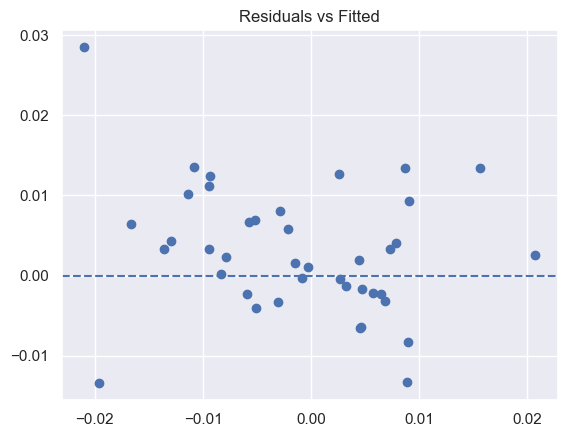

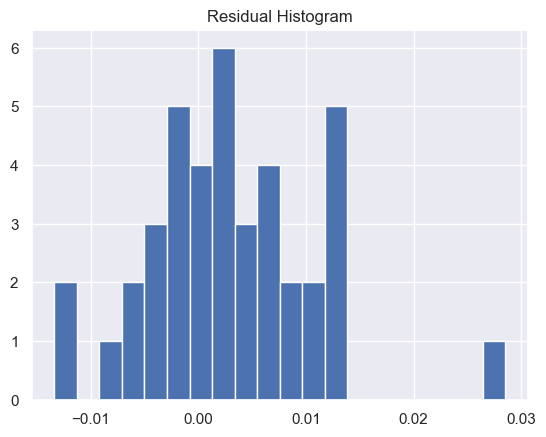

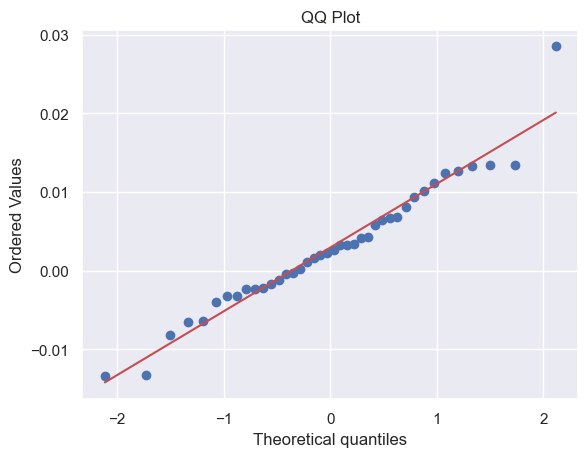

In [5]:
resid = y_test - y_pred
fitted = y_pred
plt.figure(); plt.scatter(fitted, resid); plt.axhline(0, ls='--'); plt.title('Residuals vs Fitted'); plt.show()
plt.figure(); plt.hist(resid, bins=20); plt.title('Residual Histogram'); plt.show()
plt.figure(); st.probplot(resid, dist='norm', plot=plt); plt.title('QQ Plot'); plt.show()

## 3) Optional: Add a transformed feature
Add a polynomial or interaction if diagnostics suggest mis-specification.

In [7]:
df['momentum_sq'] = df['momentum']**2
X2 = df[['mkt_excess','size','value','momentum','momentum_sq']]
X2_train, X2_test = X2.iloc[:len(X_train)], X2.iloc[len(X_train):]
lr2 = LinearRegression().fit(X2_train, y_train)
y_pred2 = lr2.predict(X2_test)
r2_2 = r2_score(y_test, y_pred2)
rmse_2 = mean_squared_error(y_test, y_pred2)
print(f'With x^2   R²={r2_2:.4f}  RMSE={rmse_2:.6f}')

With x^2   R²=0.3681  RMSE=0.000072


## 4) Interpretation (write your conclusions below)
- Linearity: Yes
- Homoscedasticity: Yes
- Normality: Yes
- Independence: Yes
- Which model do you trust and why?: Trust the one with added transformed feature (the squared momentum_sq)
- Next step you’d try: Add further transformed features

In [8]:

# Reproducibility
import numpy as np
import pandas as pd

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
print("Seed set to", RANDOM_STATE)


Seed set to 42


In [9]:

# 1) Load your cleaned dataset (edit the path below), or fall back to synthetic data
from pathlib import Path

# >>> If you have a project dataset, set it here:
PROJECT_DATA_PATH = Path("data/clean.csv")  # change if needed

def load_or_generate_data():
    if PROJECT_DATA_PATH.exists():
        df = pd.read_csv(PROJECT_DATA_PATH)
        # Heuristic: assume last column is target if 'target' not present
        target_col = "target" if "target" in df.columns else df.columns[-1]
        feature_cols = [c for c in df.columns if c != target_col]
        print(f"Loaded dataset from {PROJECT_DATA_PATH} with shape {df.shape}")
        return df, feature_cols, target_col
    else:
        # Synthetic dataset: linear relation with noise and mild heteroskedasticity
        n = 600
        X1 = np.random.uniform(0, 10, size=n)
        X2 = np.random.normal(5, 2, size=n)
        # true relationship
        y_true = 3.0 + 1.8*X1 - 0.7*X2
        # noise: base + scale increasing mildly with X1 (to test homoscedasticity diagnostics)
        eps = np.random.normal(0, 1 + 0.05*X1, size=n)
        y = y_true + eps
        
        df = pd.DataFrame({"X1": X1, "X2": X2, "y": y})
        feature_cols = ["X1", "X2"]
        target_col = "y"
        print("Generated synthetic dataset with shape", df.shape)
        return df, feature_cols, target_col

df, feature_cols, target_col = load_or_generate_data()
display(df.head())
print("Features:", feature_cols, "| Target:", target_col)


Generated synthetic dataset with shape (600, 3)


,X1,X2,y
0,3.745401,3.939485,6.330722
1,9.507143,3.414254,16.731995
2,7.319939,4.785939,12.790827
3,5.986585,2.929515,13.248953
4,1.560186,3.892701,3.669451


Features: ['X1', 'X2'] | Target: y


In [10]:

# 2) Train/test split and 3) Fit Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df[feature_cols].copy()
y = df[target_col].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

print("Intercept:", linreg.intercept_)
print("Coefficients:", dict(zip(feature_cols, linreg.coef_)))


Intercept: 3.098649367440377
Coefficients: {'X1': np.float64(1.7771482555744142), 'X2': np.float64(-0.6896257080268461)}


In [11]:

# 4) Predictions & metrics (R² and RMSE)
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

y_pred = linreg.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")


R²: 0.9473
RMSE: 1.4242


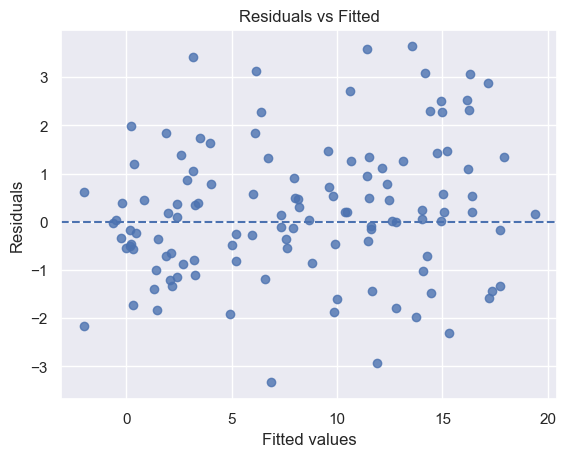

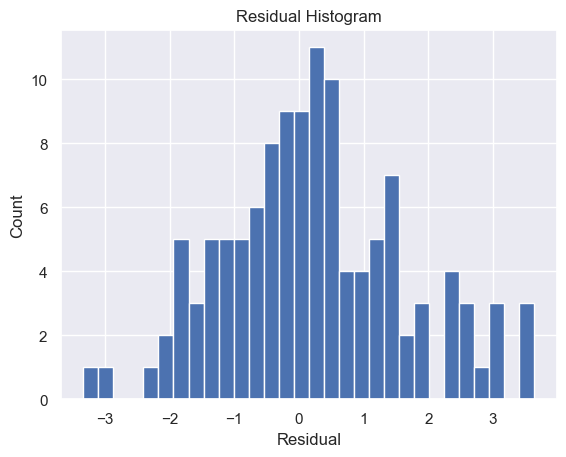

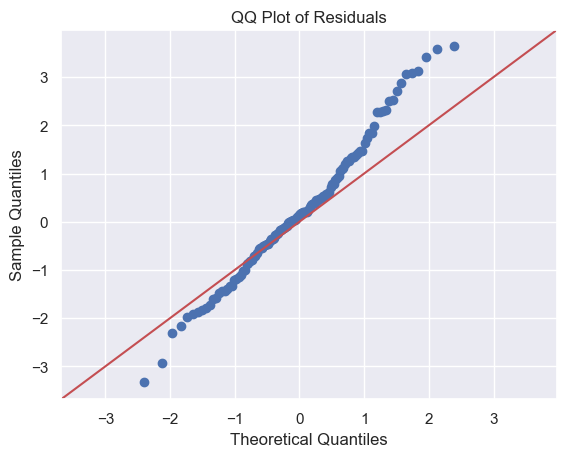

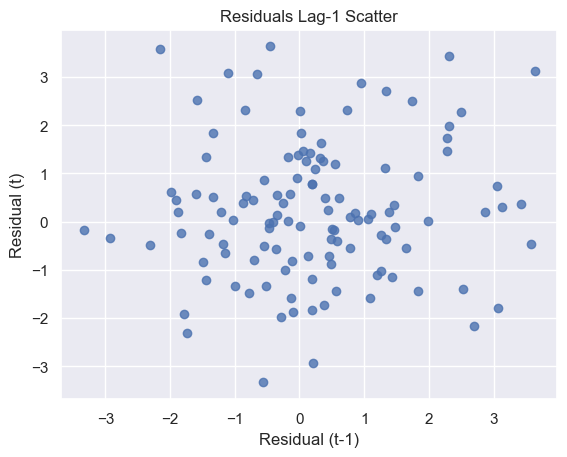

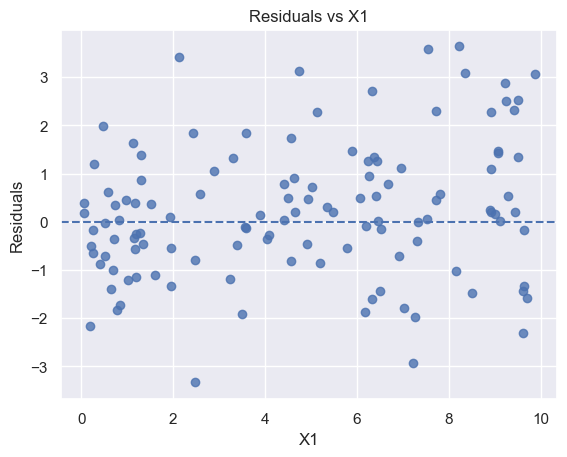

In [12]:

# 5) Residual diagnostics (linearity, independence, homoscedasticity, normality)
import matplotlib.pyplot as plt
import statsmodels.api as sm

residuals = y_test - y_pred
fitted = y_pred

# Residuals vs Fitted
plt.figure()
plt.scatter(fitted, residuals, alpha=0.8)
plt.axhline(0, linestyle="--")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

# Residual Histogram
plt.figure()
plt.hist(residuals, bins=30)
plt.xlabel("Residual")
plt.ylabel("Count")
plt.title("Residual Histogram")
plt.show()

# QQ Plot for normality
sm.qqplot(residuals, line="45")
plt.title("QQ Plot of Residuals")
plt.show()

# Residual lag-1 (independence check)
# (If there is a known temporal order, replace with time-ordered residuals. Here we just check lag-1 structure.)
resid_series = pd.Series(residuals).reset_index(drop=True)
plt.figure()
plt.scatter(resid_series.shift(1)[1:], resid_series[1:], alpha=0.8)
plt.xlabel("Residual (t-1)")
plt.ylabel("Residual (t)")
plt.title("Residuals Lag-1 Scatter")
plt.show()

# Optional: residuals vs a key predictor (use the first feature as example)
key_pred = feature_cols[0]
plt.figure()
plt.scatter(X_test[key_pred], residuals, alpha=0.8)
plt.axhline(0, linestyle="--")
plt.xlabel(key_pred)
plt.ylabel("Residuals")
plt.title(f"Residuals vs {key_pred}")
plt.show()



## Interpretation of Assumptions

- **Linearity:** If the *Residuals vs Fitted* plot looks like random scatter around 0 (no curves/funnels), the linear functional form is plausible.
- **Independence:** If the *Residuals Lag‑1* plot shows no apparent pattern or clustering along a line, and if your data are not time‑ordered, independence is plausible. For time series, consider Durbin–Watson or plotting residuals over time.
- **Homoscedasticity:** If the vertical spread of residuals is roughly constant across fitted values, homoscedasticity holds. A visible funnel shape suggests heteroskedasticity.
- **Normality:** If the residual histogram is roughly bell‑shaped and the *QQ plot* points lie near the 45° line (with mild deviations at tails being common), normality is reasonable. Normality mainly matters for inference (t/F tests and CIs), not for unbiasedness of OLS.



## Metrics Discussion

- **R²** quantifies the fraction of variance in the target explained by the model on the test set. Higher is better, but context matters.
- **RMSE** is in the original target units and summarizes average prediction error on the test set. Compare RMSE to the natural scale of *y* (e.g., typical range or standard deviation) to judge usefulness.
- **Trust:** Combine metrics with diagnostics. A modest R² can still be fine if residuals behave well and the use‑case tolerates that error; conversely, a high R² with obvious violations may not be trustworthy for inference.


[Poly d=2] R²:  0.9471
[Poly d=2] RMSE: 1.4278


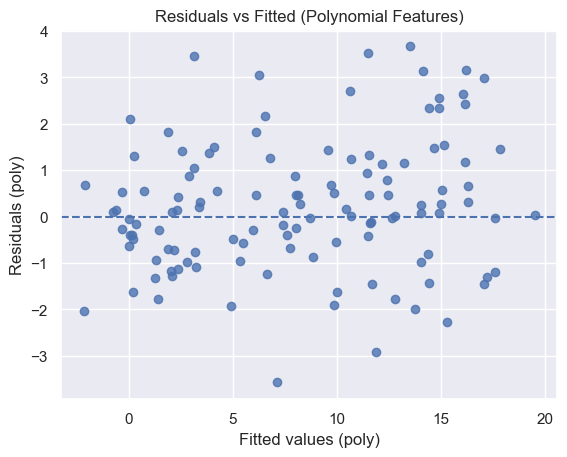

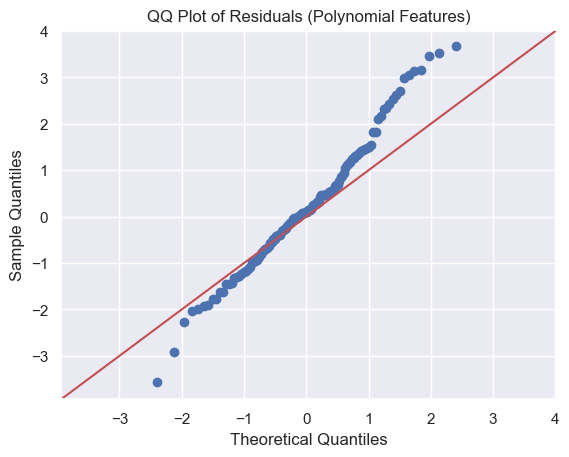

In [13]:

# 7) (Optional stretch) Add a transformed feature and compare
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

poly_model = Pipeline([
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("linreg", LinearRegression())
])

poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)

r2_poly = r2_score(y_test, y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))

print(f"[Poly d=2] R²:  {r2_poly:.4f}")
print(f"[Poly d=2] RMSE: {rmse_poly:.4f}")

# Diagnostics for transformed model (abbreviated)
residuals_poly = y_test - y_pred_poly
fitted_poly = y_pred_poly

plt.figure()
plt.scatter(fitted_poly, residuals_poly, alpha=0.8)
plt.axhline(0, linestyle="--")
plt.xlabel("Fitted values (poly)")
plt.ylabel("Residuals (poly)")
plt.title("Residuals vs Fitted (Polynomial Features)")
plt.show()

sm.qqplot(residuals_poly, line="45")
plt.title("QQ Plot of Residuals (Polynomial Features)")
plt.show()



## Conclusion

- Summarize whether you **trust** the baseline linear model for the intended purpose (explanation vs prediction).
- If the transformed model (with polynomial features) improved diagnostics and/or RMSE meaningfully, note why it might be preferable.
- Outline **next steps**: consider additional relevant predictors, interactions grounded in domain knowledge, transformations to stabilize variance, or alternative models if assumptions remain clearly violated.



> **Rubric checklist** (for the grader / for you to self‑check):
> - ✔ Correct model fit: data split, fit, predict, metrics  
> - ✔ Diagnostics & plots: residual vs fitted, histogram, QQ, plus lag‑1 / residual vs predictor  
> - ✔ Interpretation markdown for each assumption  
> - ✔ Metrics (R², RMSE) discussion tied to usefulness  
> - ✔ Reproducibility (seed) and organized narrative  
> - ➕ Stretch: polynomial feature with explanation
